In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gibbs

In [2]:
data = np.loadtxt('./spikes.txt')

times = data[0, :]
firings = data[1, :]

times, indices = np.unique(times, return_index=True)
firings = firings[indices].astype(int)

In [3]:
new_times = np.linspace(0.001, 10, 10000)
new_firings = np.zeros_like(new_times).astype(int)

# Find the indices where the times are registered
indices = np.searchsorted(new_times, times)
new_firings[indices] = firings

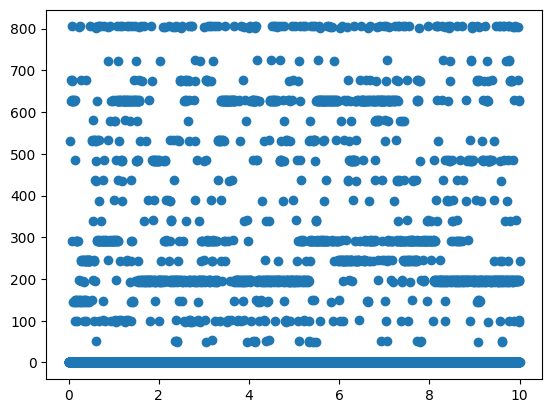

In [4]:
plt.scatter(new_times, new_firings)

In [5]:
K = 2
N = 805
T = len(new_times)
seed = 12345

v = np.ones(K)
u = np.ones((K, K))
w = np.ones((N + 1, K))
num_iterations = 100

pi_est, gamma_est, r_est, running_nmi, running_perc_corr_class,\
    pi_init, gamma_init, r_init = gibbs.gibbs_sampling(new_firings, v, u, w, num_iterations)

In [6]:
print("Pi_est:\n", pi_est)
print("Gamma_est:\n", gamma_est)
print("R_est:\n", r_est)

Pi_est:
 [0.70173153 0.29826847]
Gamma_est:
 [[0.798821   0.201179  ]
 [0.47446754 0.52553246]]
R_est:
 [[8.25759542e-01 6.83432456e-01]
 [2.52495635e-06 4.24044222e-06]
 [2.29765693e-06 7.80836342e-07]
 ...
 [1.25548728e-03 4.42475996e-03]
 [1.08442209e-06 4.50938451e-07]
 [2.87911568e-03 2.22699662e-02]]


In [7]:
num_iterations = 100
num_rep = 10
type_run = f'Estimating the parameters from the real data (K={K}) (z initialized through y and r)'

for K in range(2, 8):
    print(f'##################### K={K} ########################')

    v = np.ones(K)
    u = np.ones((K, K))
    w = np.ones((N + 1, K))
    
    gibbs.run_simulation_real(new_firings, T, N, K, seed,num_rep, type_run, num_iterations)

##################### K=2 ########################
Rep 0...
##########################
Estimated values for the parameters
Estimated Pi =  [0.42548383 0.57451617]
Estimated Gamma =  [[0.00162973 0.99837027]
 [0.34943997 0.65056003]]
Estimated R =  [[8.30429879e-01 7.68191035e-01]
 [2.30741718e-07 9.13972084e-09]
 [1.81619198e-06 5.42341628e-07]
 ...
 [3.14654432e-03 1.91052884e-03]
 [1.83040376e-06 3.02980327e-07]
 [2.44474178e-02 2.92535506e-03]]
Rep 1...
##########################
Estimated values for the parameters
Estimated Pi =  [0.53877113 0.46122887]
Estimated Gamma =  [[0.61600473 0.38399527]
 [0.7392161  0.2607839 ]]
Estimated R =  [[8.85025885e-01 5.90299458e-01]
 [3.26622838e-06 7.62315544e-06]
 [8.41779828e-07 6.80039451e-06]
 ...
 [7.41399449e-04 4.91199356e-03]
 [2.36369729e-06 7.11369425e-07]
 [1.48486879e-03 2.21608955e-02]]
Rep 2...
##########################
Estimated values for the parameters
Estimated Pi =  [0.46863998 0.53136002]
Estimated Gamma =  [[0.56324483 0.4